# Fourier Work
The following are exercises from Mark Newman's Computational Physics book.

## 1) Basics of DFTs

In [71]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import math
#import 0_AudioSignalBasics
%matplotlib notebook

1.1 Write a function that performs a discrete Fourier Transform on a *real-valued* signal.

Bonus: utilize `numba.njit` to optimize the function.

In [65]:
def DFT(Y):
    Clist = []
    N = len(Y)
    for k in range(N//2 + 1):
        Ctemp = 0
        for n, Yn in enumerate(Y):
            Ctemp += Yn*math.e**(-1j * 2*math.pi*k*(n/N))
        Clist.append(Ctemp)
    return np.array(Clist)

Consider the sine-wave with period $T$ (and thus frequency $\frac{1}{T}$). Let's assume that $T$ has units of seconds.

\begin{equation}
f(t) = sin(\frac{2 \pi}{T}t)
\end{equation}

1.2 Using Euler's formula, write this sine wave in the form of a Fourier series.
> 1.2 Solution: $f(t) = \dots$


1.3 Take $N$ samples of this sine wave over several complete periods of oscillation (an integer multiple of $T$). That is, at $t = \frac{n}{N}L$; for $n = 0, 1, ... N-1$.

In [66]:
f = 1/150
T = 4*150
N = 100
t = np.linspace(0,T*(99/100),100)
print()
#yy = []
#for i in np.linspace(0,T,100):
    #yy.append(1/2j *math.e**1j*2*math.pi*t*(1/T) + -1/2j *math.e**1j*2*math.pi*t*((T-1)/T))


#len(yy)
 
    
Y = getY(t,f)

In [67]:
def getY(t,freq,A=1):
    return A*np.sin(2*np.pi*f*t)

1.4 Plot the sampled signal, $y_{n}$.

<IPython.core.display.Javascript object>


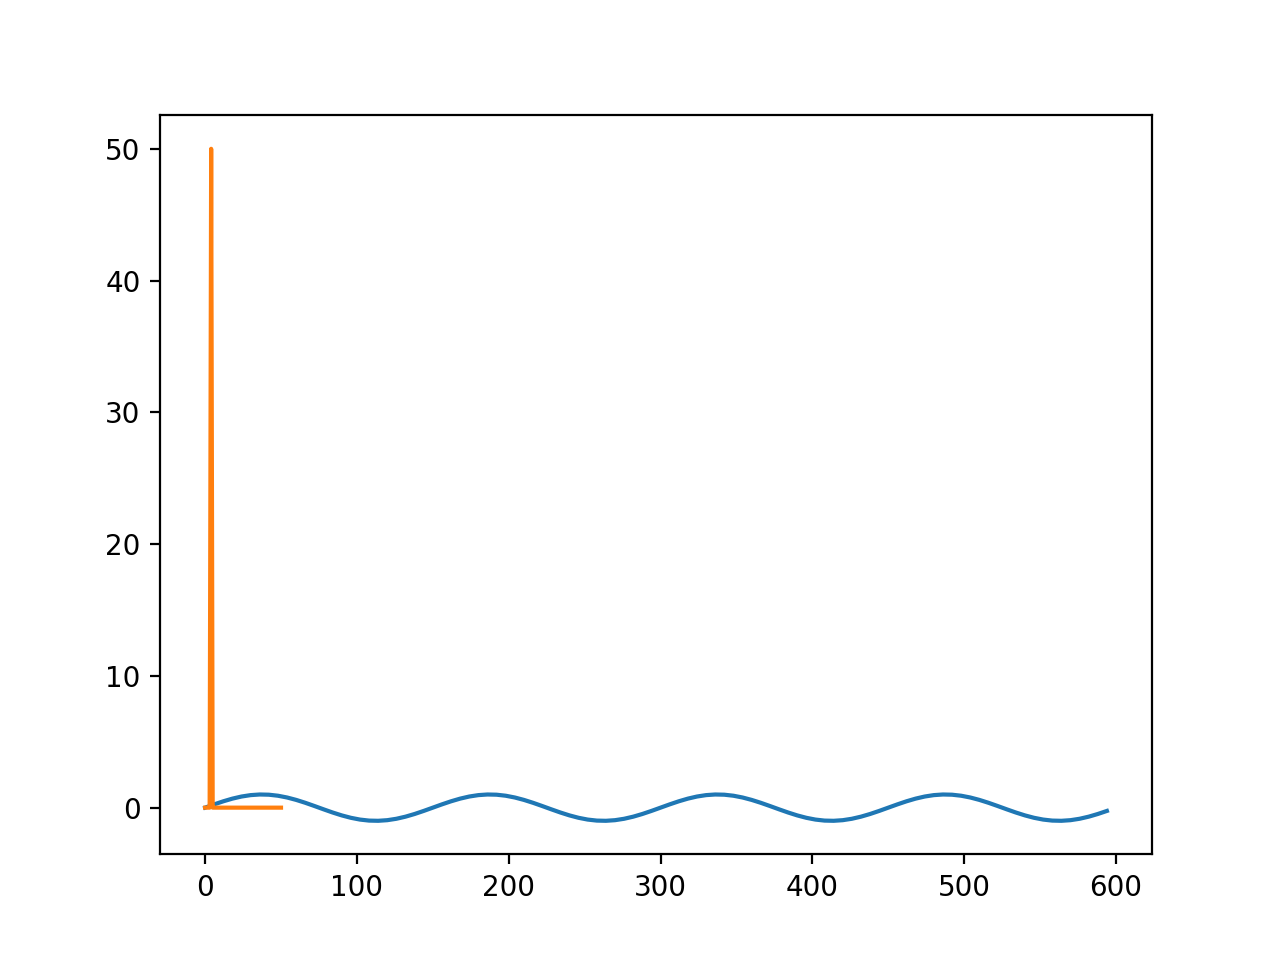

In [68]:
asd = plt.plot(t,Y)

1.5 Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$. How many Fourier-coefficients will be produced? Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results. Use the function `numpy.allclose`.

In [69]:
Cs = DFT(Y)

1.6 $k$ takes on integer values: $0, 1, ..., N//2 + 1$. Convert $k$ into frequency, $\nu$, with units of Hz ( 1 / seconds ).


In [74]:
v = np.array(range(N//2+1))/T

1.7 What should the plot of $|c_{k}|$ vs $k$,  look like, given the data we took the DFT of?
> 1.7 Solution: should be a single point with (y:1,f:1/150

1.8 Plot $|c_{\nu}|$ vs $\nu$ along with a vertical line, where you predict the peak to occur.

<IPython.core.display.Javascript object>


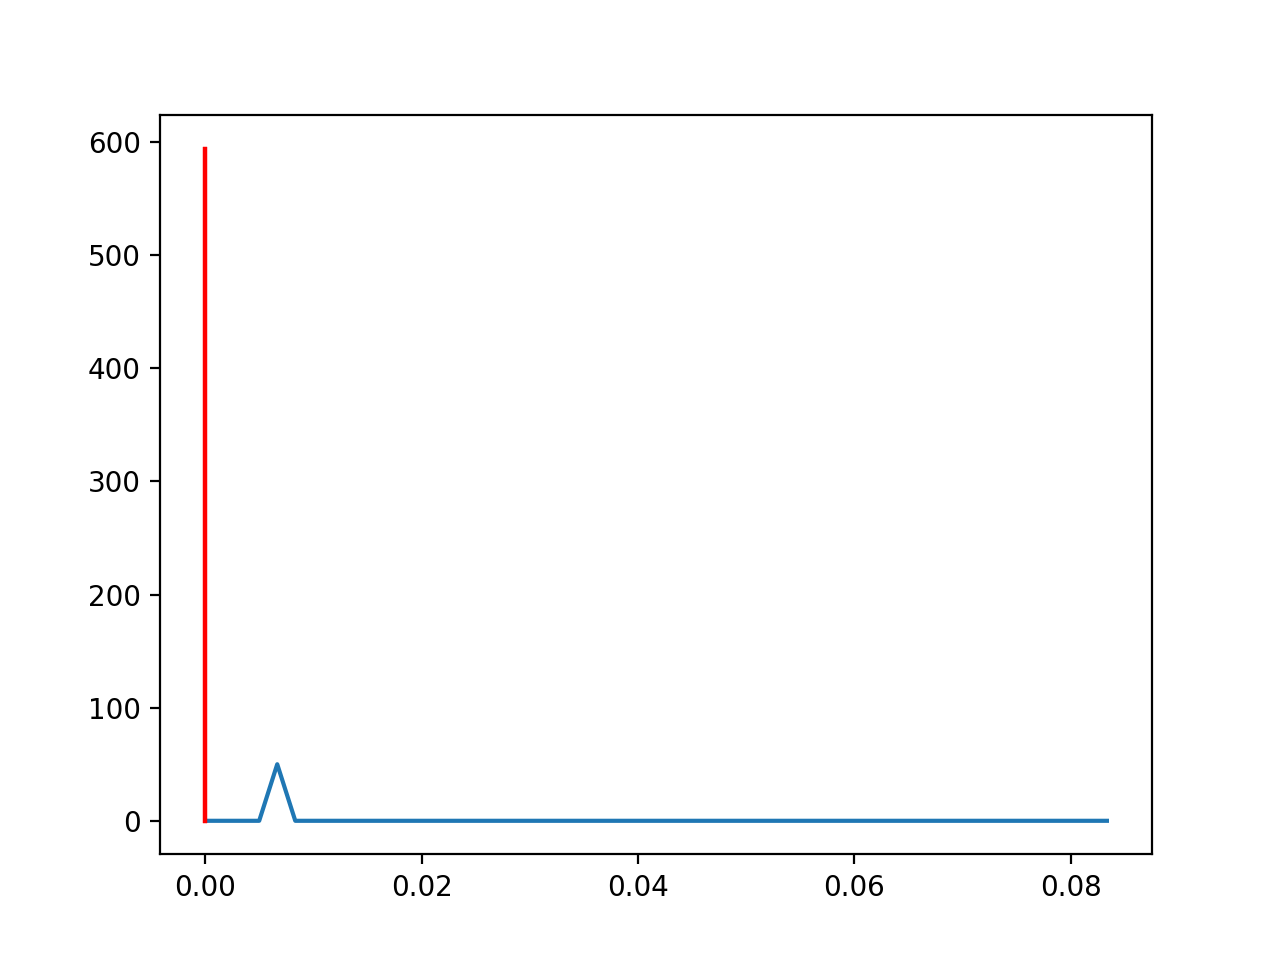

In [76]:
dsa = plt.plot(v,np.abs(Cs))

Assume that this peak-valued coefficient, $c_{p}$, is the only non-zero coefficient. In reality there are a few very small, but non-zero coefficients in its viscinity.

Given the Fourier series that you wrote above, and the equation for the DFT, see that the following relation must hold
\begin{equation}
\frac{1}{2i}e^{i\frac{2 \pi}{T}t} + \frac{-1}{2i}e^{i\frac{2 \pi (T - 1)}{T}t} \approx \frac{1}{N}(c_{p}e^{i\frac{2 \pi}{T}t} + c^{*}_{p}e^{-i\frac{2\pi}{T}t})
\end{equation}

1.8 Verify that $\frac{c_{p}}{N} \approx \frac{1}{2i}$

In [77]:
np.max(Cs)/N

(6.8384534146481719e-16+1.1129985821867194e-16j)

In [78]:
1/2j

-0.5j

Recall that the DFT expression on the right exactly reproduces the *sampled* data, and not the exact sine-wave. Furthermore, there are other small, but non-zero coefficients from our DFT that we are ignoring. This is why the equality is only approximate. Try increasing $N$, and see that this improves the precision of the equality.

1.9 Using the approximate expression on the right, write a function that performs an inverse DFT in order to recover the sampled data, $y_{n}$:

\begin{equation}
y(t_n) \approx \frac{1}{N}(c_{p}e^{i\frac{2 \pi}{T}t_n} + c^{*}_{p}e^{-i\frac{2\pi}{T}t_n})
\end{equation}



In [93]:
def reverse(Clist,T):
    N = len(Clist)
    Y = []
    for n,eachC in enumerate(Clist):
        pointListTemp = []
        for tn in T:
            pointListTemp.append(np.sin(2*np.pi*n*tn)*eachC)
        Y.append(pointListTemp)
        
    return np.sum(Y,axis=0)/N

In [96]:
len(Ypost)

100

In [97]:
Ypost = reverse(np.abs(Cs),t)

1.10 Plot the recovered sampled data and the original data. Once again, note that we are making an approximation in this inverse DFT, since we are only using the peak-valued coefficient. If we utilized all of the coefficients, the resampled data will match **exactly** with the sampled data.

In [98]:
plt.plot(Ypost,t,'r-',)

1.11 Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data. Use `np.allclose`.

In [9]:
np.fft.irfft()

1.12 Given this result, what information is needed in addition to the Fourier coefficients to completely reproduce the original data and its domain?
> Explanation